In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
from sklearn.datasets import load_breast_cancer

iris = load_breast_cancer()
X=iris.iloc[:,:-1]
y = iris.iloc[:,-1]
df = iris.copy()
df.head()

AttributeError: iloc

In [ ]:
def model_fit_and_predict(train_x, train_y, test_x, test_y):
    mlp = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=1000)
    start = time.time()
    mlp.fit(train_x,train_y)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    predict = mlp.predict(test_x)
    print("Accuracy: ", accuracy_score(predict, test_y))
    print("Confusion Matrix")
    conf_mat = confusion_matrix(predict,test_y)
    print(conf_mat)
    print("Performance Evaluation")
    print(classification_report(predict,test_y))

In [ ]:
def kmeans_cluster(X, plot):
    Kmean = KMeans(n_clusters=2)
    Kmean.fit(X)
    centers = Kmean.cluster_centers_
    plot.scatter(X[:,0],X[:,1],s=50,c='g')
    plot.scatter(centers[:,0],centers[:,1], s=200,marker='s',c='r')
    

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [ ]:
model_fit_and_predict(xtrain,ytrain,xtest,ytest)

Training time: 0.5589985847473145s
Accuracy:  0.8372093023255814
Confusion Matrix
[[14  1  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  1  4  2  0]
 [ 0  0  0  0  0  0]
 [ 0  0  3  0  0  3]]
Performance Evaluation
                                      precision    recall  f1-score   support

    building_windows_float_processed       1.00      0.93      0.97        15
building_windows_non_float_processed       0.94      1.00      0.97        15
                         containers        0.00      0.00      0.00         0
                           headlamps       1.00      0.57      0.73         7
                           tableware       0.00      0.00      0.00         0
     vehicle_windows_float_processed       1.00      0.50      0.67         6

                            accuracy                           0.84        43
                           macro avg       0.66      0.50      0.55        43
                        weighted avg       0.98      0.84      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being 

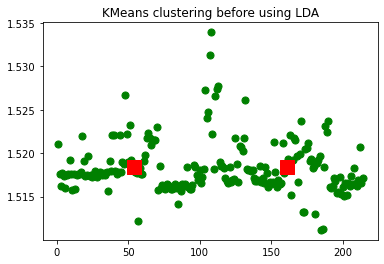

In [ ]:
kmeans_cluster(X.to_numpy(),plt)
plt.title("KMeans clustering before using LDA")
plt.show()

In [ ]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

In [ ]:
LDA_object = LDA(n_components=2)
X_data = X.to_numpy()
LDA_object.fit(X_data, y)
X_modified = LDA_object.transform(X_data)


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X_modified,y,test_size=0.3)

In [ ]:
model_fit_and_predict(xtrain,ytrain,xtest,ytest)

ValueError: Complex data not supported
[[ 1.25375143+0.j -2.53927137+0.j]
 [ 1.35492483+0.j -2.53222659+0.j]
 [ 1.24664743+0.j -2.54366079+0.j]
 [ 1.30514518+0.j -2.53384578+0.j]
 [ 1.39944204+0.j -2.53568042+0.j]
 [ 1.28913262+0.j -2.5403569 +0.j]
 [ 1.25835592+0.j -2.53856532+0.j]
 [ 1.31353388+0.j -2.53696596+0.j]
 [ 1.3861924 +0.j -2.53187965+0.j]
 [ 1.43720207+0.j -2.54471113+0.j]
 [ 1.273417  +0.j -2.53644905+0.j]
 [ 1.3287457 +0.j -2.53375986+0.j]
 [ 1.33809749+0.j -2.5343641 +0.j]
 [ 1.34247784+0.j -2.53260684+0.j]
 [ 1.28368335+0.j -2.53832057+0.j]
 [ 1.31904498+0.j -2.53537943+0.j]
 [ 1.24088006+0.j -2.53916075+0.j]
 [ 1.45667836+0.j -2.5412009 +0.j]
 [ 1.36891791+0.j -2.53206881+0.j]
 [ 1.30918928+0.j -2.5372482 +0.j]
 [ 1.30680897+0.j -2.53603681+0.j]
 [ 1.30357804+0.j -2.53536227+0.j]
 [ 1.36311215+0.j -2.53126233+0.j]
 [ 1.26736497+0.j -2.53932023+0.j]
 [ 1.40705778+0.j -2.53564078+0.j]
 [ 1.25266576+0.j -2.53815129+0.j]
 [ 1.262576  +0.j -2.53742538+0.j]
 [ 1.24419344+0.j -2.54087858+0.j]
 [ 1.26355449+0.j -2.54124925+0.j]
 [ 1.30145017+0.j -2.53765015+0.j]
 [ 1.41129055+0.j -2.54232997+0.j]
 [ 1.44560051+0.j -2.5408409 +0.j]
 [ 1.34168605+0.j -2.5363188 +0.j]
 [ 1.26986074+0.j -2.53820186+0.j]
 [ 1.31362192+0.j -2.53412043+0.j]
 [ 1.27527964+0.j -2.5372912 +0.j]
 [ 1.45145689+0.j -2.54358012+0.j]
 [ 1.24332656+0.j -2.54131751+0.j]
 [ 1.44601215+0.j -2.54317453+0.j]
 [ 1.35037364+0.j -2.53114   +0.j]
 [ 1.32292891+0.j -2.53462951+0.j]
 [ 1.3909791 +0.j -2.53413667+0.j]
 [ 1.24349748+0.j -2.5405114 +0.j]
 [ 1.31903182+0.j -2.53590142+0.j]
 [ 1.34876022+0.j -2.53316815+0.j]
 [ 1.27223843+0.j -2.53788269+0.j]
 [ 1.44831103+0.j -2.54431381+0.j]
 [ 1.45563385+0.j -2.5439908 +0.j]
 [ 1.41423339+0.j -2.54054781+0.j]
 [ 1.45318112+0.j -2.5443762 +0.j]
 [ 1.40932525+0.j -2.53870964+0.j]
 [ 1.2809602 +0.j -2.53986198+0.j]
 [ 1.28584504+0.j -2.53698778+0.j]
 [ 1.32484549+0.j -2.53660707+0.j]
 [ 1.35673929+0.j -2.53447178+0.j]
 [ 1.26143116+0.j -2.53974344+0.j]
 [ 1.2775448 +0.j -2.53661612+0.j]
 [ 1.3034028 +0.j -2.53427029+0.j]
 [ 1.2725845 +0.j -2.53961712+0.j]
 [ 1.41751805+0.j -2.53735195+0.j]
 [ 1.33453709+0.j -2.5333774 +0.j]
 [ 1.3602691 +0.j -2.52323768+0.j]
 [ 1.33887172+0.j -2.53309152+0.j]
 [ 1.32334442+0.j -2.53683095+0.j]
 [ 1.33282212+0.j -2.54176065+0.j]
 [ 1.2458564 +0.j -2.54048883+0.j]
 [ 1.31124713+0.j -2.53577553+0.j]
 [ 1.34784422+0.j -2.53307815+0.j]
 [ 1.32722839+0.j -2.53644108+0.j]
 [ 1.42101787+0.j -2.54412192+0.j]
 [ 1.34157072+0.j -2.5343164 +0.j]
 [ 1.29982496+0.j -2.53852022+0.j]
 [ 1.27736115+0.j -2.5378108 +0.j]
 [ 1.44106431+0.j -2.5430265 +0.j]
 [ 1.33581113+0.j -2.53163238+0.j]
 [ 1.26471037+0.j -2.54186554+0.j]
 [ 1.35479859+0.j -2.53265761+0.j]
 [ 1.28385399+0.j -2.53520204+0.j]
 [ 1.35414544+0.j -2.53355052+0.j]
 [ 1.45299809+0.j -2.54046577+0.j]
 [ 1.23835311+0.j -2.54016011+0.j]
 [ 1.24866966+0.j -2.54123042+0.j]
 [ 1.25595373+0.j -2.53973551+0.j]
 [ 1.39547023+0.j -2.53540567+0.j]
 [ 1.25293732+0.j -2.53933026+0.j]
 [ 1.26599235+0.j -2.53851096+0.j]
 [ 1.27730366+0.j -2.53632614+0.j]
 [ 1.34181484+0.j -2.53070801+0.j]
 [ 1.28409105+0.j -2.54059301+0.j]
 [ 1.31683232+0.j -2.53615001+0.j]
 [ 1.2295658 +0.j -2.54063221+0.j]
 [ 1.4418931 +0.j -2.54212196+0.j]
 [ 1.26183234+0.j -2.53728521+0.j]
 [ 1.26224532+0.j -2.53947766+0.j]
 [ 1.33681621+0.j -2.54008066+0.j]
 [ 1.39016161+0.j -2.53499209+0.j]
 [ 1.27904635+0.j -2.53937244+0.j]
 [ 1.35294491+0.j -2.53639368+0.j]
 [ 1.30254136+0.j -2.53778251+0.j]
 [ 1.35745665+0.j -2.53473871+0.j]
 [ 1.31858268+0.j -2.533576  +0.j]
 [ 1.32173194+0.j -2.53478268+0.j]
 [ 1.33654368+0.j -2.53875076+0.j]
 [ 1.44684981+0.j -2.5430349 +0.j]
 [ 1.3147589 +0.j -2.53739701+0.j]
 [ 1.30966542+0.j -2.53666163+0.j]
 [ 1.34203032+0.j -2.53332764+0.j]
 [ 1.2612758 +0.j -2.53986043+0.j]
 [ 1.24137528+0.j -2.54195212+0.j]
 [ 1.3359321 +0.j -2.53449563+0.j]
 [ 1.33737333+0.j -2.53122361+0.j]
 [ 1.2401619 +0.j -2.53939313+0.j]
 [ 1.31928595+0.j -2.53482911+0.j]
 [ 1.36231296+0.j -2.52982978+0.j]
 [ 1.43909859+0.j -2.54085889+0.j]
 [ 1.34050142+0.j -2.53413571+0.j]
 [ 1.3931008 +0.j -2.5348299 +0.j]
 [ 1.284779  +0.j -2.53899476+0.j]
 [ 1.25522704+0.j -2.54090987+0.j]
 [ 1.24732882+0.j -2.54263456+0.j]
 [ 1.39618092+0.j -2.53567455+0.j]
 [ 1.35673639+0.j -2.53355293+0.j]
 [ 1.39808685+0.j -2.53573633+0.j]
 [ 1.41718334+0.j -2.54162448+0.j]
 [ 1.39185547+0.j -2.53715226+0.j]
 [ 1.25029067+0.j -2.53887041+0.j]
 [ 1.41093902+0.j -2.53801698+0.j]
 [ 1.31141048+0.j -2.53672874+0.j]
 [ 1.36043167+0.j -2.53258492+0.j]
 [ 1.3575371 +0.j -2.53110458+0.j]
 [ 1.34462319+0.j -2.53374758+0.j]
 [ 1.30270494+0.j -2.53784734+0.j]
 [ 1.32863978+0.j -2.53373909+0.j]
 [ 1.41511166+0.j -2.53762269+0.j]
 [ 1.24204628+0.j -2.5422211 +0.j]
 [ 1.30527474+0.j -2.53488231+0.j]
 [ 1.3072058 +0.j -2.53412262+0.j]
 [ 1.36207055+0.j -2.53400813+0.j]
 [ 1.27463892+0.j -2.53626253+0.j]
 [ 1.28196636+0.j -2.53919494+0.j]
 [ 1.34106934+0.j -2.53520684+0.j]
 [ 1.31815254+0.j -2.53420111+0.j]
 [ 1.30466692+0.j -2.53623193+0.j]
 [ 1.25685486+0.j -2.53755566+0.j]
 [ 1.30305143+0.j -2.53834098+0.j]
 [ 1.44565169+0.j -2.54350156+0.j]
 [ 1.36331438+0.j -2.53164967+0.j]
 [ 1.3958394 +0.j -2.53646656+0.j]
 [ 1.44792262+0.j -2.54279215+0.j]]


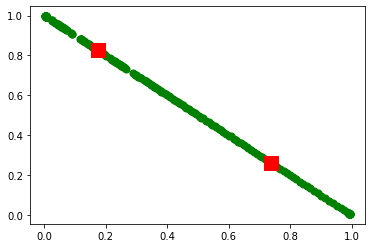

In [ ]:
kmeans_cluster(X_modified,plt)
plt.show()